# LangChain

---------------------------------------------------------------------------------------------------------

### 1. What is LangChain ?

* Initially there were only few models, later many models came into the race, each model came up with different set of libraries to access the models.
  
* For example, OpenAI had its own API, Hugging Face used transformers, and models like GPT-3 or LLaMA required specific libraries like openai or torch. This made it challenging to integrate and switch between different models.

* So Langchain created a common framework to develop Gen AI App.

* With LangChain, developers can easily access models like OpenAI, Hugging Face, LLaMA, Google Gemini, and others through a single, simplified API.

### Setup LangChain:
* Website
https://www.langchain.com/

* SignUp 

------------------------------------------------------------------------------------------------------

### 2. With LangChain VS Without LangChain

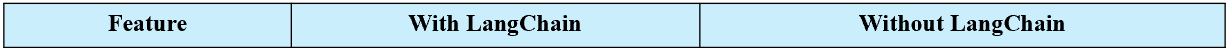
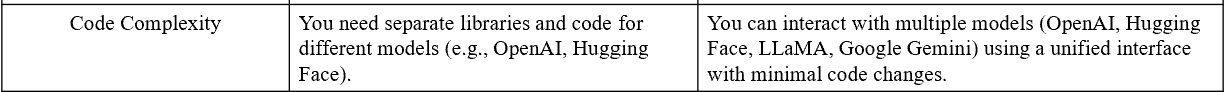
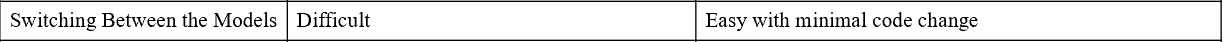
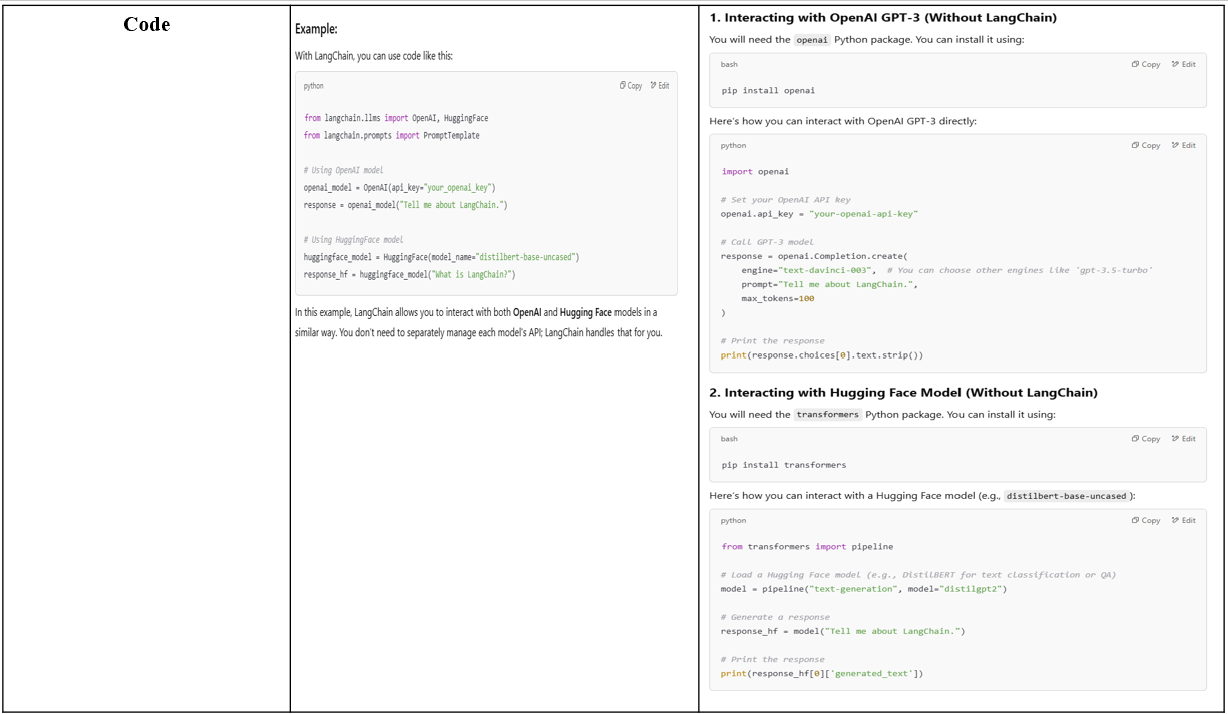

--------------------------------------------------------------------------------------------------------------------------------------------------------

### 3. LangChain Ecosystem

* The LangChain Ecosystem refers to the collection of tools, libraries, modules, and integrations within LangChain that make it easier to build applications using large language models (LLMs)

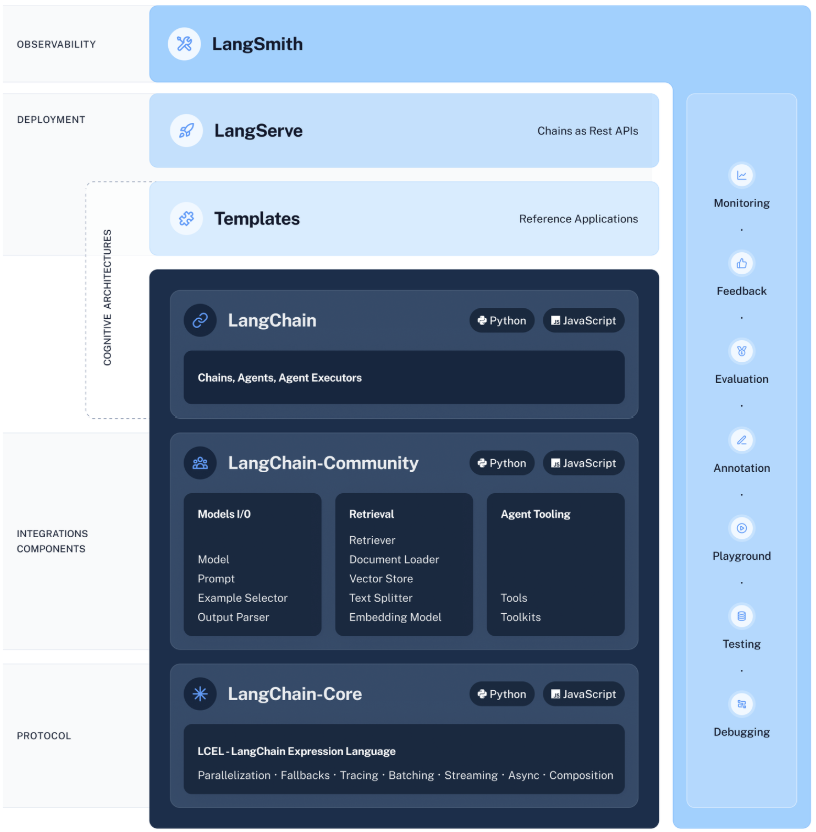

### 1. LangSmith:

* Used to do LLMOPS : Testing ,Debugging, Monitoring, Evaluation, Feedback, Annotation etc

### Setting UP LangSmith

* Website
https://smith.langchain.com/onboarding

* API Key for LangSmith
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

### Implementation

##### Step 1: Creating a LLM model

In [4]:
# To Import the .env file
import os
from dotenv import load_dotenv
load_dotenv()

# Import the API keys from .env file
os.environ['OPENAI_API_KEY'] = os.getenv("OPENAI_API_KEY") # Access OpenAI 
os.environ['LANGCHAIN_API_KEY'] = os.getenv("LANGCHAIN_API_KEY") # To Access Langsmith
os.environ['LANGCHAIN_TRACING_V2'] = "true" # To track the project in Langsmith
os.environ['LANGCHAIN_PROJECT'] = os.getenv("LANGCHAIN_PROJECT") # Get the name of the project.

#Import neccessary Libraries
from langchain_openai import ChatOpenAI #importing chatbot for OpenAI

# Create a LLM model
llm = ChatOpenAI(model="gpt-4o")
print(llm)

client=<openai.resources.chat.completions.Completions object at 0x00000193126B15A0> async_client=<openai.resources.chat.completions.AsyncCompletions object at 0x00000193127C1030> root_client=<openai.OpenAI object at 0x000001930EA36830> root_async_client=<openai.AsyncOpenAI object at 0x00000193126B1210> model_name='gpt-4o' model_kwargs={} openai_api_key=SecretStr('**********')


##### Step 2 : Ask a Question and get a response from a LLM model

In [10]:
result = llm.invoke("Who is God?")
print(result.content)

The concept of God varies widely across different cultures, religions, and philosophies. Here are a few perspectives:

1. **Monotheistic Religions**:
   - **Christianity**: God is an all-powerful, all-knowing, and benevolent being who created the universe and is represented in the Holy Trinity as the Father, the Son (Jesus Christ), and the Holy Spirit.
   - **Islam**: God, known as Allah, is singular and indivisible, the creator of the universe, merciful, and just. Islam emphasizes complete submission to God's will.
   - **Judaism**: God is a singular, all-powerful entity who is the creator and ruler of the universe. God is both just and merciful, and is traditionally understood through the Hebrew Bible.

2. **Polytheistic Religions**:
   - **Hinduism**: There are many gods and goddesses, each representing different aspects of the supreme universal spirit known as Brahman. Major deities include Vishnu, Shiva, and Devi.
   - **Ancient Greek/Roman Religions**: They believed in multiple g

##### Step 3 : Go to the Langsmith for Tracking

Website : https://smith.langchain.com/o/b9b833e5-5adb-4371-8b03-f14ddf2da889/projects

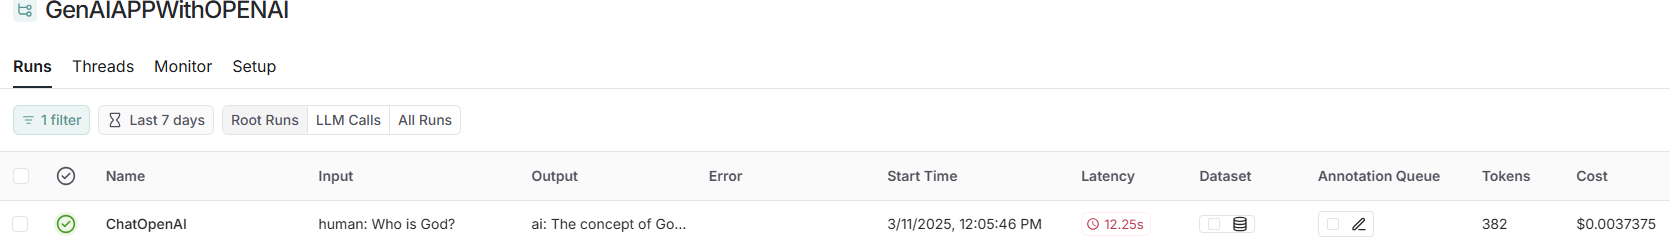

------------------------------------------------------------------------------------------------------

### 2. LangServe:

* LangServe helps developers deploy Langchain runnables and chains as a REST API.

* LangServe is integrated with FASTAPI and uses pydantic for data validation.

* FASTAPI is a modern, fast framework for building APIs with Python, allowing developers to create web applications quickly and easily. It supports automatic validation, documentation, and high performance.

* Pydantic is a Python library that helps validate and manage data by ensuring it follows the correct format and type. It makes it easier to work with data in web applications by catching errors early.

### Pre-Requiste

* Install : "langserve"
* Install : "fastapi"
* Install : "uvicorn"
* Install : "sse_starlette"

### Step 1 : Create serve.py file and write the code

In [ ]:
# To Import the .env file
import os
from dotenv import load_dotenv
load_dotenv()

# Import the API keys from .env file
os.environ['GROQ_API_KEY'] = os.getenv("GROQ_API_KEY") # Acess Groq to interact with llm in Groq platform.

# Import neccessary Libraries
from fastapi import FastAPI
from langchain_groq import ChatGroq # Import to use Groq's AI models with ultra-fast LPU inference
from langchain_core.output_parsers import StrOutputParser  # responsible for displaying response message from LLM.
from langchain_core.prompts import ChatPromptTemplate # create own chat prompt
from langserve import add_routes # it helps to create api

# Model
model = ChatGroq(model="Gemma2-9b-It") # Check the website to find the model name

# Prompt Template
generic_template = "Translate the following into {language}:"
prompt = ChatPromptTemplate.from_messages(
    [
        ("system",generic_template),
        ("user","{text}") # give text in run time
    ]
)

# Output Parser
parser = StrOutputParser()

# Chain
chain = prompt|model|parser

# App definition
app = FastAPI(title = "Langchain Server",
              version = "1.0",
              description = "A simple API Server using Langchain runnable interfaces")

# Adding chain routes
add_routes(
    app,
    chain,
    path="/chain"
)

if __name__ == "__main__":
    import uvicorn
    uvicorn.run(app,host="127.0.0.1", port = 8000)

### Step 2 : Run python serve.py in terminal

### Step 3 : Open the link

------------------------------------------------------------------------------------------------------

1. Langchain : 

* LangChain is a framework that lets you build powerful applications using large language models by connecting them with external data, tools, and memory.